<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202402/blob/main/Lecture06/Notebook_Lasso.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



# Regularization: Lasso

## Predicting Wages

Our objective today is to construct a model of individual wages

$$
w = f(X) + u 
$$

where w is the  wage, and X is a matrix that includes potential explanatory variables/predictors. In this problem set, we will focus on a linear model of the form

\begin{align}
 ln(w) & = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p  + u 
\end{align}

were $ln(w)$ is the logarithm of the wage.

To illustrate I'm going to use a sample of the NLSY97. The NLSY97 is  a nationally representative sample of 8,984 men and women born during the years 1980 through 1984 and living in the United States at the time of the initial survey in 1997.  Participants were ages 12 to 16 as of December 31, 1996.  Interviews were conducted annually from 1997 to 2011 and biennially since then.  

Let's load the packages and the data set:

In [1]:
# install.packages("pacman") #run this line if you use Google Colab

In [2]:
#packages
require("pacman")
p_load("tidyverse","stargazer")

nlsy <- read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/nlsy97.csv')

nlsy = nlsy  %>%   drop_na(educ) #dropea los valores faltantes (NA)

Loading required package: pacman

Rows: 1266 Columns: 994
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (994): lnw_2016, educ, black, hispanic, other, exp, afqt, mom_educ, dad_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We want to construct a model that predicts well out of sample, and we have potentially 994 regressors. We are going to regularize this regression using Ridge.

## Lasso

We first illustrate ridge regression, which can be fit using glmnet() with alpha = 1 and seeks to minimize

$$
\sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij}    \right) ^ 2 + \lambda \sum_{j=1}^{p} |\beta_j|.
$$

Notice that the intercept is not penalized. 


We are going to use Glmnet. Glmnet is a package that fits generalized linear and similar models via penalized maximum likelihood. The regularization path is computed for the lasso or elastic net penalty at a grid of values (on the log scale) for the regularization parameter lambda. The algorithm is extremely fast!

## Intuition: few predictors

In [3]:
p_load("glmnet")

In [4]:
set.seed(123)
#Vector that needs predicting
y <- nlsy$lnw_2016

# Matrix of predictos (only educ, mother and father's education)
X <- as.matrix(nlsy  %>% select(educ,mom_educ,dad_educ))



### No penalty = OLS

In [5]:
lasso_no_pen <- glmnet(
  x = X,
  y = y,
  alpha = 1, #lasso
  lambda=0
)

In [6]:
lasso_no_pen$beta

3 x 1 sparse Matrix of class "dgCMatrix"
                  s0
educ     0.066949246
mom_educ 0.016717441
dad_educ 0.009053839

In [7]:
summary(lm(y~X))


Call:
lm(formula = y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8605 -0.3959 -0.0439  0.3470  4.3537 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.809099   0.150243  12.041  < 2e-16 ***
Xeduc       0.066955   0.009560   7.004 4.04e-12 ***
Xmom_educ   0.016718   0.012086   1.383    0.167    
Xdad_educ   0.009051   0.010358   0.874    0.382    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8393 on 1262 degrees of freedom
Multiple R-squared:  0.06996,	Adjusted R-squared:  0.06775 
F-statistic: 31.64 on 3 and 1262 DF,  p-value: < 2.2e-16


### With Penalty

In [8]:
lasso_pen <- glmnet(
  x = X,
  y = y,
  alpha = 1, #lasso
  lambda=.02
)

In [9]:
lasso_pen$beta

3 x 1 sparse Matrix of class "dgCMatrix"
                  s0
educ     0.063042864
mom_educ 0.012416202
dad_educ 0.006054874

### Larger Penalty

In [10]:
lasso_pen_large <- glmnet(
  x = X,
  y = y,
  alpha = 1, #lasso
  lambda=1e70
)

In [11]:
lasso_pen_large$beta

3 x 1 sparse Matrix of class "dgCMatrix"
         s0
educ      0
mom_educ  .
dad_educ  .

### Various Penalties

In [12]:
lasso01 <- glmnet(
  x = X,
  y = y,
  alpha = 1 #lasso
)

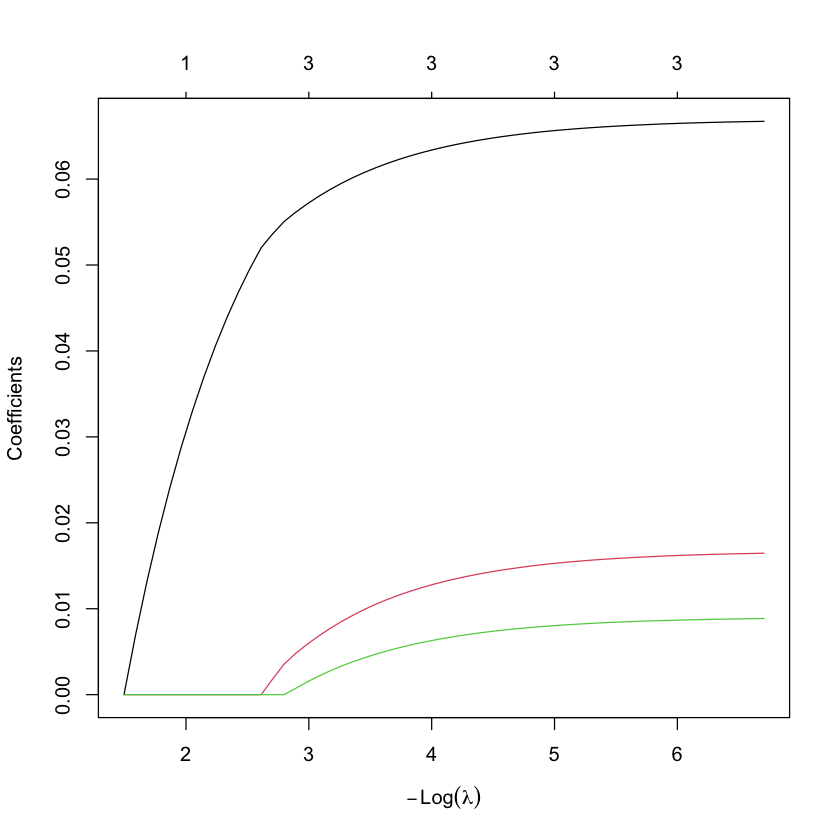

In [13]:

plot(lasso01, xvar = "lambda")

## Lasso all predictors

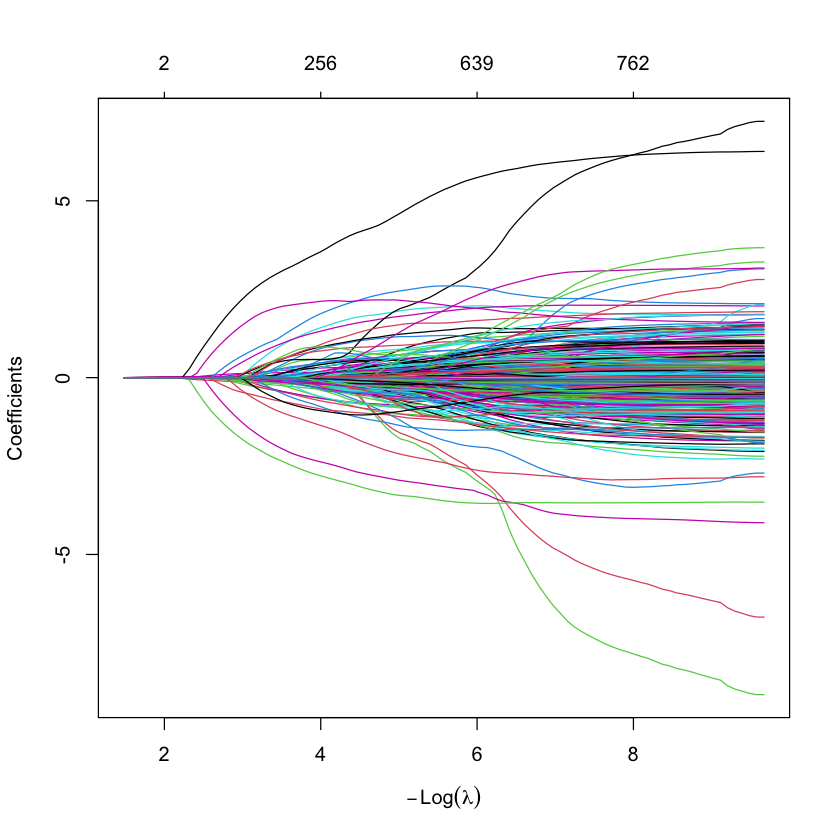

In [14]:
# Matrix of predictos (all but lnw_2016)
X <- as.matrix(nlsy  %>% select(-lnw_2016))

#Vector that needs predicting
y <- nlsy$lnw_2016


lasso0 <- glmnet(
  x = X,
  y = y,
  alpha = 1 #lasso
)


plot(lasso0, xvar = "lambda")

In [15]:
coef(lasso0)[,c(89,80,40,1)]

994 x 4 sparse Matrix of class "dgCMatrix"
                                     s88           s79           s39       s0
(Intercept)                 3.605755e+00  3.463487e+00  3.561880e+00 3.109862
educ                       -5.619590e-02 -4.441379e-02  .            .       
black                      -1.057603e-01 -1.047479e-01 -1.625870e-01 .       
hispanic                    3.017333e-01  2.988788e-01  2.208790e-01 .       
other                      -3.772309e-01 -3.806415e-01 -3.028256e-01 .       
exp                        -9.550070e-02 -8.415539e-02 -4.898107e-02 .       
afqt                        2.604351e-02  2.569190e-02  2.111559e-02 .       
mom_educ                    1.513747e-02  1.157380e-02  .            .       
dad_educ                   -3.683054e-04  .             .            .       
yhea_100_1997               .             .             .            .       
yhea_2000_1997              2.944660e-02  3.474569e-02  .            .       
yhea_2100_1997       

## Selección de la penalización

In [16]:
cv.lasso <- cv.glmnet(
  x = X,
  y = y,
  alpha = 1 #lasso
)

In [17]:
cv.lasso


Call:  cv.glmnet(x = X, y = y, alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Index Measure      SE Nonzero
min 0.06769    14  0.7022 0.03466      22
1se 0.17162     4  0.7315 0.03418       2

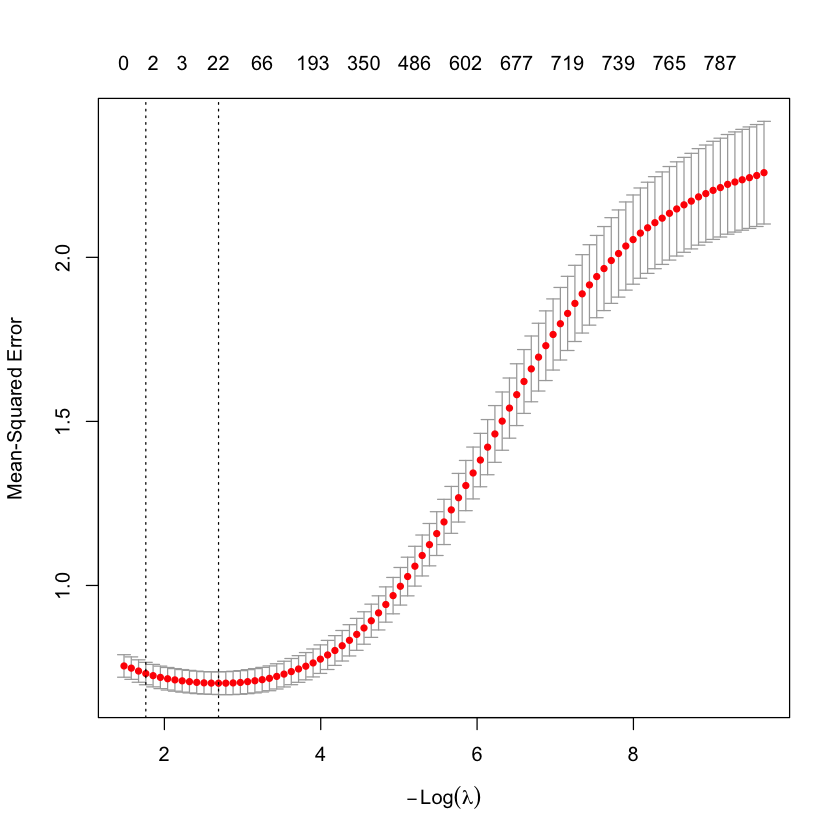

In [18]:
plot(cv.lasso)

This plots the cross-validation curve (red dotted line) along with upper and lower standard deviation curves
along the $\lambda$ sequence (error bars). 

Two special values along the $\lambda$ sequence are indicated by the vertical dotted lines:
 - lambda.min is the value of $\lambda$ that gives minimum mean cross-validated error, while 
 - lambda.1se is the value of $\lambda$ that gives the most regularized model such that the cross-validated error is within one standard error of the minimum.

In [19]:
cv.lasso$lambda.min

[1] 0.06769028

In [20]:
sqrt(cv.lasso$cvm[cv.lasso$lambda == cv.lasso$lambda.min])

[1] 0.8379582

In [21]:
coef(cv.lasso, s = "lambda.min")

994 x 1 sparse Matrix of class "dgCMatrix"
                              lambda.min
(Intercept)                 2.562881e+00
educ                        3.220442e-02
black                      -9.063946e-02
hispanic                    .           
other                       .           
exp                         .           
afqt                        2.947112e-02
mom_educ                    .           
dad_educ                    .           
yhea_100_1997               .           
yhea_2000_1997              .           
yhea_2100_1997              .           
yhea_2200_1997              .           
ysaq_284_1997               .           
ysaq_285_1997               .           
ysaq_291a_1997              .           
ysaq_292_1997               .           
ysaq_293_1997               .           
ysaq_294_1997               .           
ysaq_294a_1997              .           
ysaq_295_1997               .           
ysaq_296_1997               .           
ysaq_297_1997 

# Elastic Net 

\begin{align}
min_{\beta} EN(\beta) &= \sum_{i=1}^n (y_i-\beta_0 - \sum_{j=1}^p x_{ij}\beta_j)^2  + \lambda\left(\alpha \sum_{j=1}^p |\beta_j| + \frac{(1-\alpha)}{2} \sum_{j=1}^p (\beta_j)^2\right)
\end{align}

In [22]:
cv.en <- cv.glmnet(
  x = X,
  y = y,
  alpha = 0.5 #EN
)

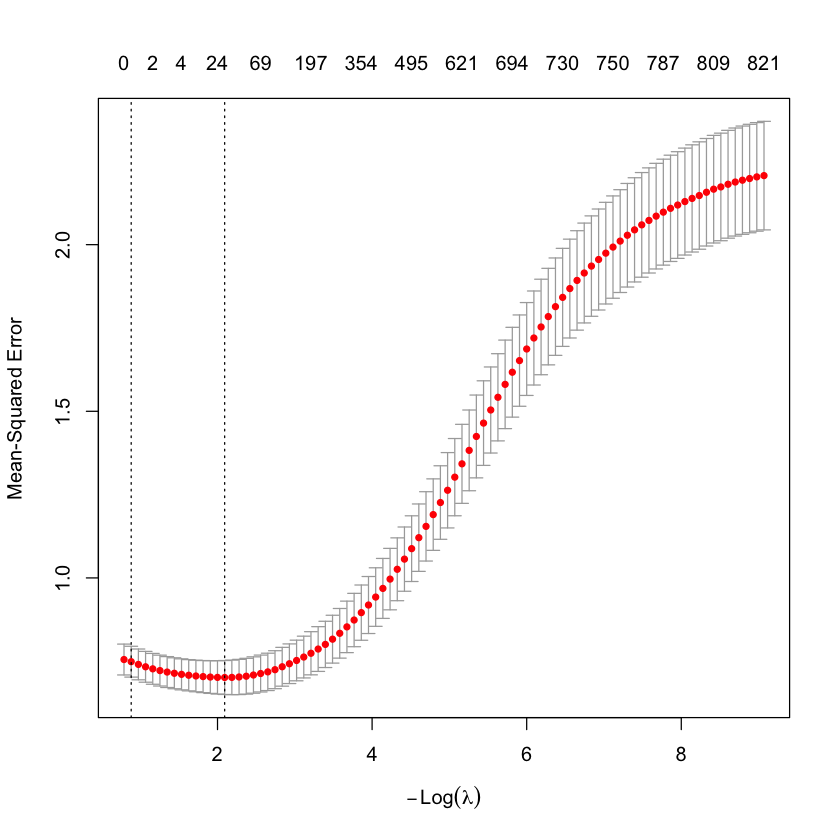

In [23]:
plot(cv.en)

# Compare

In [24]:
# EN
sqrt(cv.en$cvm[cv.en$lambda == cv.en$lambda.min])

[1] 0.8373828

In [25]:
# Lasso
sqrt(cv.lasso$cvm[cv.lasso$lambda == cv.lasso$lambda.min])

[1] 0.8379582

In [27]:
# Lasso
sqrt(cv.lasso$cvm[cv.lasso$lambda == cv.lasso$lambda.1se])

[1] 0.8553068

In [28]:
# Ridge
cv.ridge <- cv.glmnet(
  x = X,
  y = y,
  alpha = 0 #ridge
)

sqrt(cv.ridge$cvm[cv.ridge$lambda == cv.ridge$lambda.min])

[1] 0.8401752

In [31]:
cv.en25 <- cv.glmnet(
  x = X,
  y = y,
  alpha = 0.25 #EN
)

sqrt(cv.en25$cvm[cv.en25$lambda == cv.en25$lambda.min])

[1] 0.8356185